# Quantum Computing and Graph Theory - Classical Implementation

In [1]:
# Setup

import numpy as np
import matplotlib.pyplot as plt
import math as m

### Graph Class Testing

In [2]:
from graph import Graph

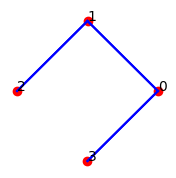

Bit string: 101100
Adjacency matrix:
 [[0 1 0 1]
 [1 0 1 0]
 [0 1 0 0]
 [1 0 0 0]]
Edge sequence (sum of rows): [2 2 1 1]
Connectivity sequence (upper-triangle binary string value): [5. 2. 0. 0.]


In [3]:

example_graph = Graph(np.array([
    [0, 1, 0, 1],
    [1, 0, 1, 0],
    [0, 1, 0, 0],
    [1, 0, 0, 0],
]))


example_graph.plot_graph(vertex_labels=True)
print("Bit string:", example_graph.to_bitstring())
print("Adjacency matrix:\n", example_graph.adj_matrix)
print("Edge sequence (sum of rows):", example_graph.get_edge_sequence())
print("Connectivity sequence (upper-triangle binary string value):", example_graph.get_connectivity_sequence())

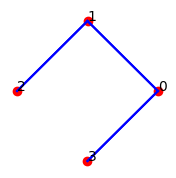

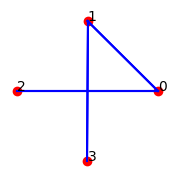

In [4]:
example_graph = Graph(np.array([
    [0, 1, 0, 1],
    [1, 0, 1, 0],
    [0, 1, 0, 0],
    [1, 0, 0, 0],
]))

example_graph.plot_graph(vertex_labels=True)
example_graph.permute(2,3)
example_graph.plot_graph(vertex_labels=True)

#### Subgraph Search

Clique searching is an NP-Complete problem (Sipser).

As an extension of that idea, any subgraph search is similar to a clique search and is thus very likely also NP-Complete.

This algorithm is an initial attempt to explore this search in a classical manner


Inspired by a 2D convolution

##### All possible subgraphs

![K3inK6](./media/videos/subgraph_search/720p30/K3inK6.gif "K3 in K6")

More GIFs:
* [K4 in K6](./media/videos/subgraph_search/720p30/K4inK6.gif)
* [K4 in K8](./media/videos/subgraph_search/720p30/K4inK8.gif)
* [K9 in K10](./media/videos/subgraph_search/720p30/K9inK10.gif)

##### Subgraph Search Algorithm

1. Construct the set of all subgraphs $H$ of order $k$ from graph $G$ of order $n$
    * A subgraph exists as a list of $k$ vertex labels from $G$ such as $\{ 2, 3, 4 \}$
    * In the above example, we are looking at the subgraph H of 3 vertices $v^G_2$, $v^G_3$ and, $v^G_4$ from $V(G)$
    * This list ordering constructs an index mapping $\alpha$ from $V(H)$ to $V(G)$ ($v^H_0 \rightarrow v^G_2$)
2. For each subgraph:
    1. Check that all edges in $H$ have the same value as the corresponding edge in $G$
        * Use $\alpha$: $\alpha(e^G_{2,4}) = e^H_{0,2} = 1 \iff e^G_{2,4} = 1$
    2. If a subgraph $H$ has all edges matching to $G$ then $H \subseteq G$
    3. Else, $H \nsubseteq G$

K3 in K4: True


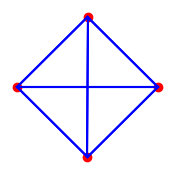

K3 in G4a: True


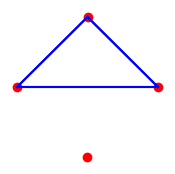

K3 in G4b: True


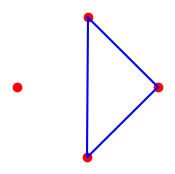

K3 in G4c: False


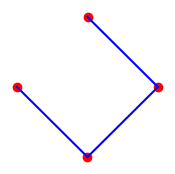

K3 in G5a: True


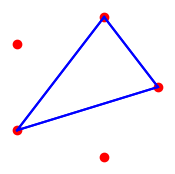

In [12]:
K3 = Graph(np.array([
    [0, 1, 1],
    [1, 0, 1],
    [1, 1, 0]
]))

K4 = Graph(np.array([
    [0, 1, 1, 1],
    [1, 0, 1, 1],
    [1, 1, 0, 1],
    [1, 1, 1, 0]
]))

G4a = Graph(np.array([
    [0, 1, 1, 0],
    [1, 0, 1, 0],
    [1, 1, 0, 0],
    [0, 0, 0, 0]
]))

G4b = Graph(np.array([
    [0, 1, 0, 1],
    [0, 0, 0, 1],
    [0, 0, 0, 0],
    [0, 0, 0, 0]
]))

G4c = Graph(np.array([
    [0, 1, 0, 1],
    [0, 0, 0, 0],
    [0, 0, 0, 1],
    [0, 0, 0, 0]
]))

G5a = Graph(np.array([
    [0, 1, 0, 1, 0],
    [1, 0, 0, 1, 0],
    [0, 0, 0, 0, 0],
    [1, 1, 0, 0, 0],
    [0, 0, 0, 0, 0]
]))

print(f"K3 in K4: {K4.has_subgraph(K3)}")
K4.plot_graph(vertex_labels=False)

print(f"K3 in G4a: {G4a.has_subgraph(K3)}")
G4a.plot_graph(vertex_labels=False)

print(f"K3 in G4b: {G4b.has_subgraph(K3)}")
G4b.plot_graph(vertex_labels=False)

print(f"K3 in G4c: {G4c.has_subgraph(K3)}")
G4c.plot_graph(vertex_labels=False)

print(f"K3 in G5a: {G5a.has_subgraph(K3)}")
G5a.plot_graph(vertex_labels=False)

#### $\mathbb{H}$(3)

In [6]:
H3 = [
    Graph(np.zeros((3, 3), dtype=np.uint8)),
    Graph(np.array([ [0, 1, 0], [1, 0, 0], [0, 0, 0] ], dtype=np.uint8)),
    Graph(np.array([ [0, 1, 1], [1, 0, 0], [1, 0, 0] ], dtype=np.uint8)),
    Graph(np.ones((3, 3), dtype=np.uint8))
]

for i, h in enumerate(H3):
    # h.plot_graph(vertex_labels=True)
    print(i, h.to_bitstring(), h.get_edge_sequence(), h.get_connectivity_sequence(), np.sum(h.get_connectivity_sequence()))

0 000 [0 0 0] [0. 0. 0.] 0.0
1 100 [1 1 0] [2. 0. 0.] 2.0
2 110 [2 1 1] [3. 0. 0.] 3.0
3 111 [2 2 2] [3. 1. 0.] 4.0


#### $\mathbb{H}$(4)

i Bitstring Edge-Sequence Edge-Count Connectivity-Sequence Connectivity-Sum
0 000000 [0 0 0 0] 0.0 [0. 0. 0. 0.] 0.0
1 100000 [1 1 0 0] 1.0 [4. 0. 0. 0.] 4.0
2 110000 [2 1 0 0] 1.5 [6. 0. 0. 0.] 6.0
3 100001 [1 1 1 1] 2.0 [4. 0. 1. 0.] 5.0
4 101100 [2 2 1 1] 3.0 [5. 2. 0. 0.] 7.0
5 101010 [2 2 0 2] 3.0 [5. 1. 0. 0.] 6.0
6 111000 [3 1 1 1] 3.0 [7. 0. 0. 0.] 7.0
7 101110 [2 3 1 2] 4.0 [5. 3. 0. 0.] 8.0
8 101101 [2 2 2 2] 4.0 [5. 2. 1. 0.] 8.0
9 111011 [3 2 2 3] 5.0 [7. 1. 1. 0.] 9.0
10 111111 [3 3 3 3] 6.0 [7. 3. 1. 0.] 11.0


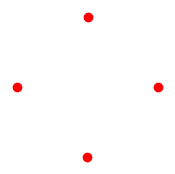

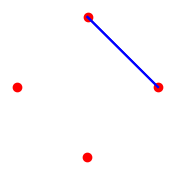

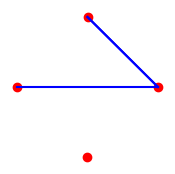

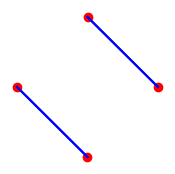

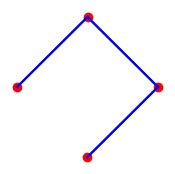

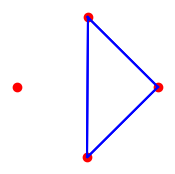

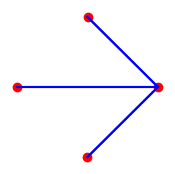

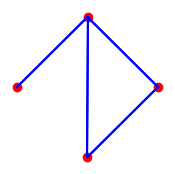

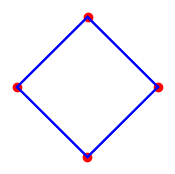

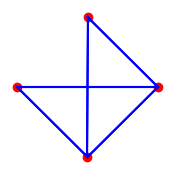

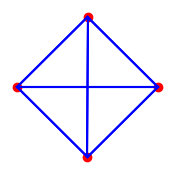

In [7]:
H4 = [
    Graph(np.zeros((4, 4), dtype=np.uint8)),
    Graph(np.array([ [0, 1, 0, 0], [1, 0, 0, 0], [0, 0, 0, 0], [0, 0, 0, 0] ], dtype=np.uint8)),
    Graph(np.array([ [0, 1, 1, 0], [1, 1, 0, 0], [0, 0, 0, 0], [0, 0, 0, 0] ], dtype=np.uint8)),
    Graph(np.array([ [0, 1, 0, 0], [1, 0, 0, 0], [0, 0, 0, 1], [0, 0, 1, 0] ], dtype=np.uint8)),
    Graph(np.array([ [0, 1, 0, 1], [1, 0, 1, 0], [0, 1, 0, 0], [1, 0, 0, 0] ], dtype=np.uint8)),
    Graph(np.array([ [0, 1, 0, 1], [1, 0, 0, 1], [0, 0, 0, 0], [1, 1, 0, 0] ], dtype=np.uint8)),
    Graph(np.array([ [0, 1, 1, 1], [1, 0, 0, 0], [1, 0, 0, 0], [1, 0, 0, 0] ], dtype=np.uint8)),
    Graph(np.array([ [0, 1, 0, 1], [1, 0, 1, 1], [0, 1, 0, 0], [1, 1, 0, 0] ], dtype=np.uint8)),
    Graph(np.array([ [0, 1, 0, 1], [1, 0, 1, 0], [0, 1, 0, 1], [1, 0, 1, 0] ], dtype=np.uint8)),
    Graph(np.array([ [0, 1, 1, 1], [1, 0, 0, 1], [1, 0, 0, 1], [1, 1, 1, 0] ], dtype=np.uint8)),
    Graph(np.ones((4, 4), dtype=np.uint8))
]

print("i", "Bitstring", "Edge-Sequence" ,"Edge-Count", "Connectivity-Sequence", "Connectivity-Sum")
for i, h in enumerate(H4):
    print(i, h.to_bitstring(), h.get_edge_sequence(), h.get_edge_count(), h.get_connectivity_sequence(), np.sum(h.get_connectivity_sequence()))

for h in H4:
    h.plot_graph(vertex_labels=False)

### Generating the set of Non-Homomorphic Graphs of size $n$

In [8]:
graph_size = 3

H = []
H.append(Graph(np.zeros((graph_size, graph_size), dtype=np.uint8))) # The empty graph
H.append(Graph(np.ones((graph_size, graph_size), dtype=np.uint8))) # The complete graph

for i, h in enumerate(H):
    print(i, h.to_bitstring(), h.get_edge_sequence(), h.get_connectivity_sequence())


0 000 [0 0 0] [0. 0. 0.]
1 111 [2 2 2] [3. 1. 0.]


# Ramsey Numbers algorithms

1. Exhaustive $\mathbb{G}(n)$ Search
    * Test if all graphs of order $n$ have a $k$-clique or $l$-independent set
    * $O(2^{n^2})$
2. Exhaustive $\mathbb{H}(n)$ Search
    * Test if all non-homomorphic graphs of order $n$ have a $k$-clique or $l$-independent set
    * $O(n!)$
3. Depth First $\mathbb{G}(n)$ Search
    * Construct the graphs of $\mathbb{G}(n)$ with a binary tree, while performing a test at each tree vertex to prune the search depth
    * If the leaf vertices are never reached then there is no graph $G \in \mathbb{G}$ with either a $k$-clique or $l$-independent set
    * Worst Case: $O(2^{n^2})$
        * Worse case if the colouring is the very last leaf node, which is an empty graph, thus technically making the worst case impossible if $n$ > $l$
        * <div class="alert alert-block alert-info"><b>TODO:</b> Perform average case analysis</div>

#### Checklist
- [ ] Exhaustive $\mathbb{G}(n)$
- [ ] Exhaustive $\mathbb{H}(n)$
- [ ] DFS $\mathbb{G}(n)$

### Exhaustive $\mathbb{G}(n)$ Search for $R(k,l)$